**Modules**

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Create Linear Regression Model by using Equation**

In [ ]:
# Define/Intialize the Weights & Bias
Weights = 0.7
Bias    = 0.3

# Create the X Dataset
X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)

# Create the Y Dataset with Linear Regression
Y = Bias + Weights * X

In [ ]:
# Split the Dataset into Training and Testing
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.10 , random_state = 42)

# Display the Lenght of the Training/Testing Data
print(f"The Lenght of the X Train is : {len(x_train)}")
print(f"The Lenght of the Y Train is : {len(y_train)}")
print(f"The Lenght of the X Test  is : {len(x_test)}")
print(f"The Lenght of the Y Test  is : {len(y_test)}")

The Lenght of the X Train is : 45
The Lenght of the Y Train is : 45
The Lenght of the X Test  is : 5
The Lenght of the Y Test  is : 5


In [ ]:
# Define the Function that Visualization the Result
def plot_data(xtrain = x_train , ytrain = y_train , xtest = x_test , ytest = y_test , prediction = None):
  # Display the Training Data
  plt.scatter(xtrain , ytrain , c = "b" , s = 4 , label = "Training Dataset")
  # Display the Testing Data
  plt.scatter(xtest  , ytest  , c = "g" , s = 4 , label = "Testing Dataset")
  # Display the Prediction Data
  if prediction is not None:
    plt.scatter(xtest , prediction , c = "r" , s = 4 , label = "Prediction Dataset")
  
  plt.legend(prop = {"size" : 8})

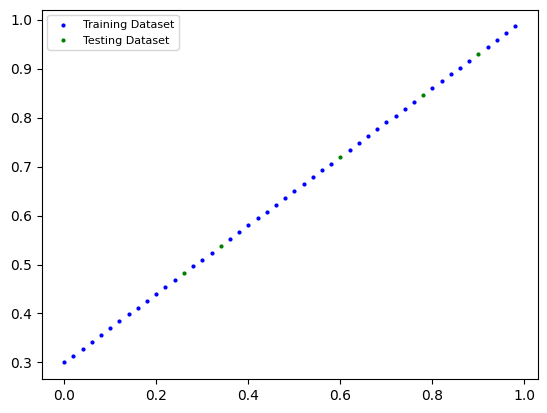

In [ ]:
# Visualization the Training and Testing Dataset
plot_data()

**Create the Linear Regression Model with Pytorch Module V1**

In [ ]:
# Create the Class of the Linear Regression Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Define/Instialization the Weights and Bias
    self.Weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.Bias    = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    
  # Define the Forward Propagation
  def forward(self , x: torch.Tensor):
    # Define the Linear Regression Equation
    return self.Bias + self.Weights * x

In [ ]:
# Set the Manual Seed
torch.manual_seed(42)

# Create the Object of the LinearRegressionModel
model_0 = LinearRegressionModel()

# Display the Parameters of the Linear Regression Model
print(list(model_0.parameters()) , end = "\n\n")

# Display the Parameters of the Linear Regression Model in Dictionary format
print(model_0.state_dict())

In [ ]:
# Predict the Result with Linear Regression Model
model_0.eval()

with torch.inference_mode():
  y_pred = model_0(x_test)

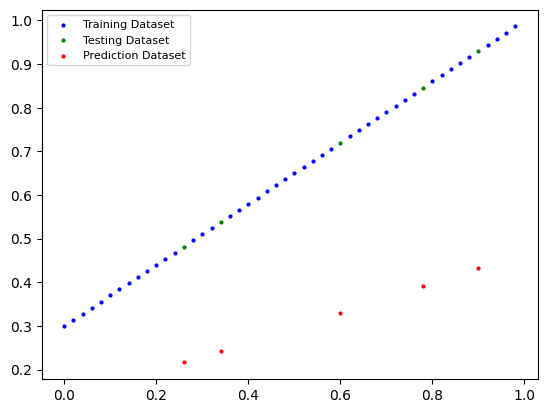

In [ ]:
# Visualization the Training & Testing & Predicted Data
plot_data(prediction = y_pred)                            # This Model Version not perform Well